# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

---

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | ta`u
Processing Record 7 of Set 1 | alvorada
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | talodi
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | conception bay south
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | yeed
Processing Record 21 of Set 1 | betare oya
Processing Record 22 of Set 1 | adamstown
Processing Re

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,70,20,1.03,AR,1738043352
1,bredasdorp,-34.5322,20.0403,19.77,85,100,7.85,ZA,1738043353
2,crane,31.3974,-102.3501,4.66,79,73,3.78,US,1738043354
3,enewetak,11.3474,162.3373,27.14,78,50,7.85,MH,1738043355
4,blackmans bay,-43.0167,147.3167,19.07,37,8,6.91,AU,1738043357


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,70,20,1.03,AR,1738043352
1,bredasdorp,-34.5322,20.0403,19.77,85,100,7.85,ZA,1738043353
2,crane,31.3974,-102.3501,4.66,79,73,3.78,US,1738043354
3,enewetak,11.3474,162.3373,27.14,78,50,7.85,MH,1738043355
4,blackmans bay,-43.0167,147.3167,19.07,37,8,6.91,AU,1738043357


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

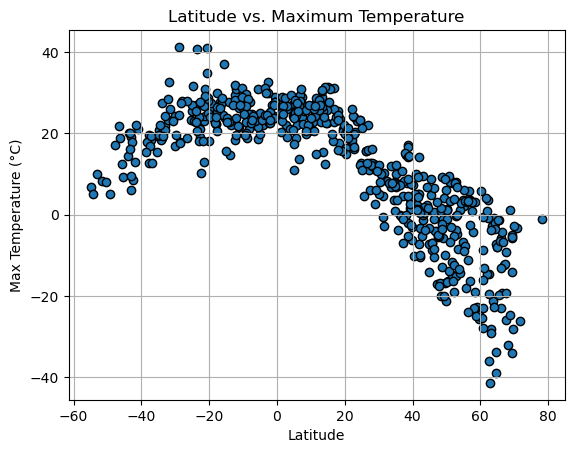

In [71]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

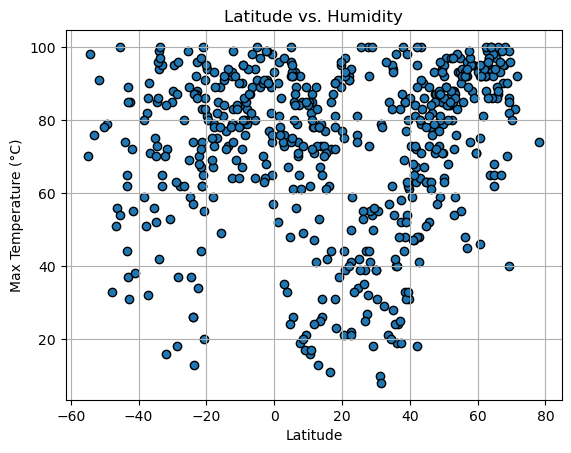

In [73]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(x_axis, humidity, edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

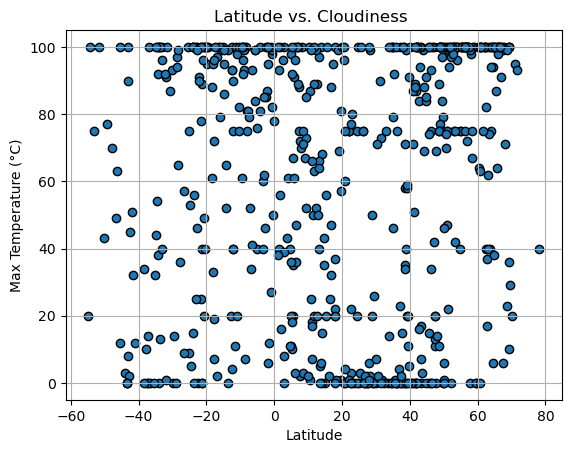

In [74]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(x_axis, cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

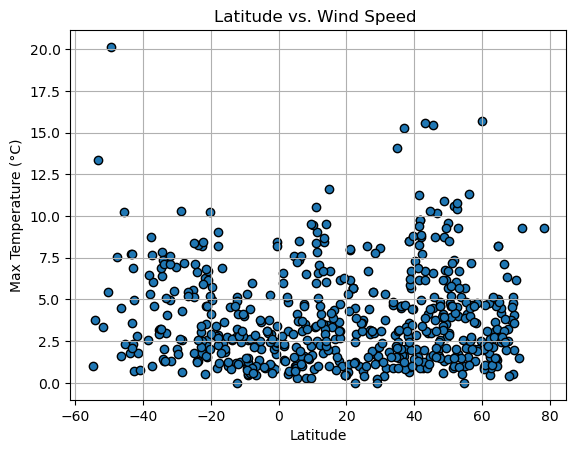

In [75]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(x_axis, wind, edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,crane,31.3974,-102.3501,4.66,79,73,3.78,US,1738043354
3,enewetak,11.3474,162.3373,27.14,78,50,7.85,MH,1738043355
7,iqaluit,63.7506,-68.5145,-21.15,65,40,3.09,CA,1738043360
9,ilulissat,69.2167,-51.1000,-13.99,40,36,0.51,GL,1738043363
11,talodi,10.6325,30.3797,22.74,16,1,3.38,SD,1738043365


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,70,20,1.03,AR,1738043352
1,bredasdorp,-34.5322,20.0403,19.77,85,100,7.85,ZA,1738043353
4,blackmans bay,-43.0167,147.3167,19.07,37,8,6.91,AU,1738043357
5,ta`u,-14.2336,-169.5144,27.71,77,52,4.53,AS,1738043358
6,alvorada,-12.4800,-49.1247,22.34,92,4,1.18,BR,1738043359


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7440288028705495


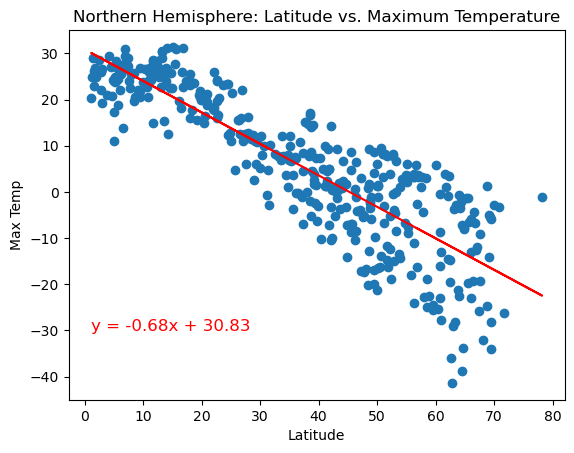

In [140]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Latitude vs. Maximum Temperature')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

# y = mx+b equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(1, -30, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

The r^2-value is: 0.30705493394035654


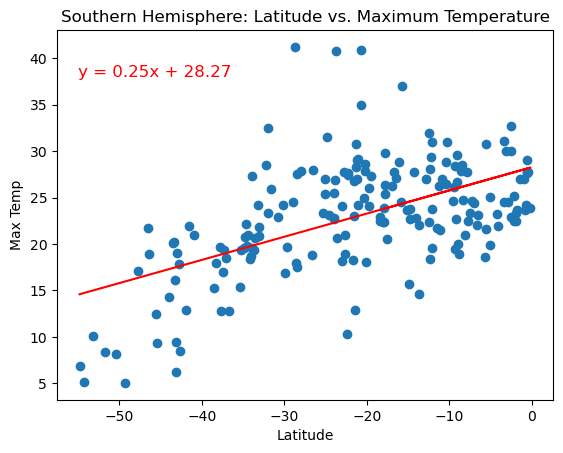

In [141]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Latitude vs. Maximum Temperature')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-55, 38, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere: The linear relationship shows that as the latitude moves further north, the temperature decreases. The r^2-value is 0.74 showing that latitude is a high predictor of temperature.

Southern Hemisphere: The linear regression shows that as the latitude moves further north, the temperature increases. The r^2-value is 0.31 showing that 31% of the temperature varitaion can be explained by latitude, but other factors also affect it. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.11118049001351248


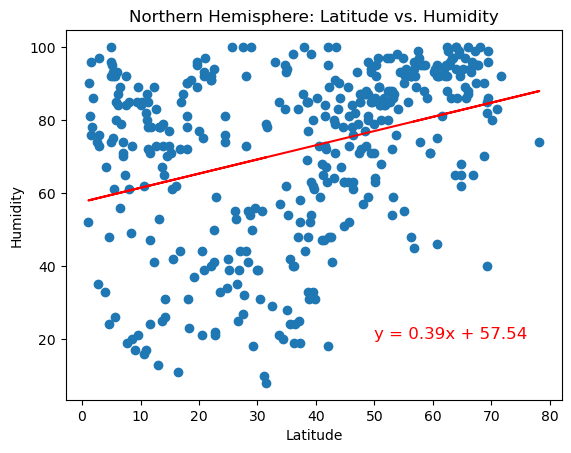

In [134]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs. Humidity')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(50, 20, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

The r^2-value is: 0.0851859506531382


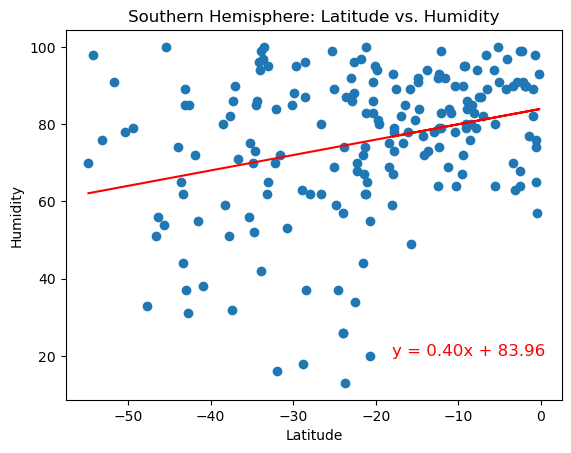

In [142]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Latitude vs. Humidity')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-18, 20, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere: The r^2-value is 0.11 showing that latitude is a low predictor of humidity.

Southern Hemisphere: The linear regression shows that as the latitude moves further north, the humidity increases. The r^2-value is 0.09 showing that latitude is not a strong predictor of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06264913529724744


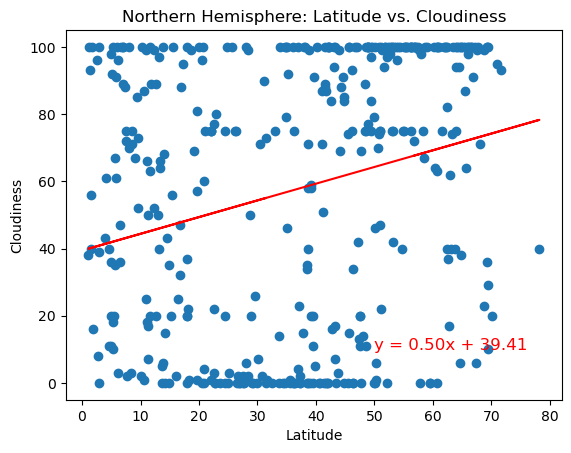

In [136]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(50, 10, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

The r^2-value is: 0.07467778753052932


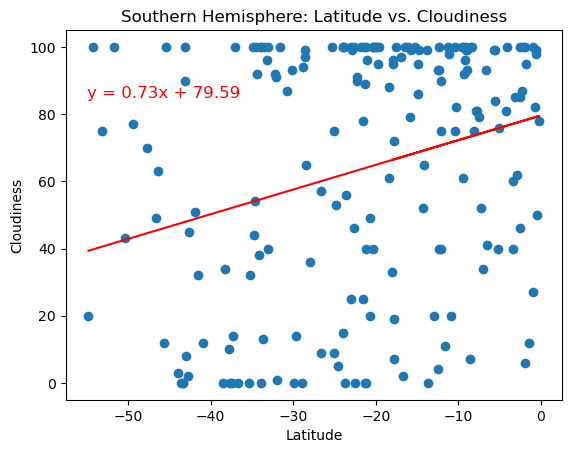

In [137]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-55, 85, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

**Discussion about the linear relationship:** 
The r^2-value for the Northern Hemisphere is 0.06, and the r^2-value for the Southern Hemisphere is 0.07. Both of these r^2 values are low, showing that latitude is not a strong predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.003079769282381247


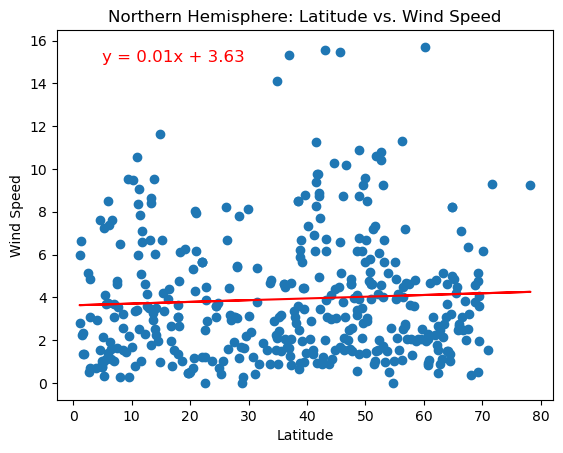

In [138]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(5, 15, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

The r^2-value is: 0.12229610946751596


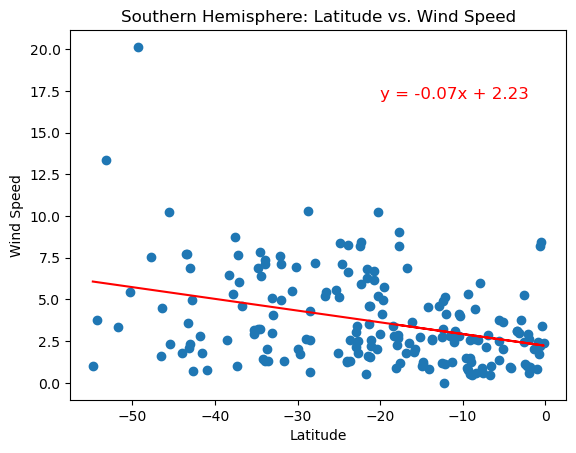

In [143]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')

# Linear regression line
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')

equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(-20, 17, equation, fontsize=12, color='red')
r_squared = r_value**2

print(f'The r^2-value is: {r_squared}')
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere the r^2-value is: 0.003.
In the Southern Hemisphere the r^2-value is: 0.12.
These r^2 values show that latitude is a poor predictor for wind speed in both hemispheres.